In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
clinical_trial_load = "data/clinicaltrial_data.csv"
mouse_drug_load = "data/mouse_drug_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_file = pd.read_csv(clinical_trial_load)
mouse_drug_file = pd.read_csv(mouse_drug_load)

# Combine the data into a single dataset
entire_clinical_file = pd.merge(clinical_trial_file, mouse_drug_file, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
entire_clinical_file.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [40]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = entire_clinical_file.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)

# Flatten the column headings
mean_tumor_volume = mean_tumor_volume.reset_index()

# Preview DataFrame
mean_tumor_volume

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [41]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_volume = entire_clinical_file.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
se_tumor_volume = pd.DataFrame(se_tumor_volume)

# Preview DataFrame
se_tumor_volume.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [42]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume = mean_tumor_volume.reset_index()
mean_tumor_volume_pivot = mean_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

se_tumor_volume = se_tumor_volume.reset_index()
mean_tumor_volume_pivot = se_tumor_volume.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
mean_tumor_volume_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


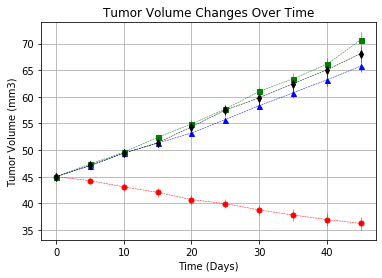

In [43]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Ketapril"], yerr=tumor_vols_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Volume Changes Over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)

# Show the Figure
plt.show()

In [44]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatistic_sites = entire_clinical_file.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_metastatistic_sites = pd.DataFrame(mean_metastatistic_sites)

# Preview DataFrame
mean_metastatistic_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [45]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metastatistic_sites = entire_clinical_file.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
se_metastatistic_sites = pd.DataFrame(se_metastatistic_sites)

# Preview DataFrame
se_metastatistic_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [47]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_pivot_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

se_met_sites = se_met_sites.reset_index()
met_sites_pivot_mean = se_met_sites.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_pivot_mean.head()

ValueError: cannot insert level_0, already exists

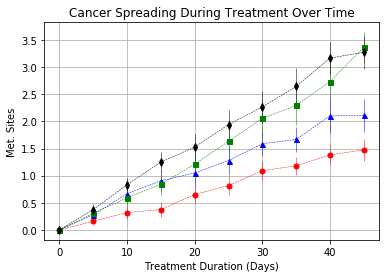

In [50]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Cancer Spreading During Treatment Over Time")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)

# Show the Figure
plt.show()

In [51]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = clinical_file_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
